In [ ]:
from datascience import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load Up Data

We begin by loading data on COVID-19 during the early times of the pandemic back in early 2020

In [ ]:
covid_us = Table().read_table("covid_data/covid_us.txt")
covid_us.show(5)

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
16,AS,ASM,16,60,nan,American Samoa,US,-14.271,-170.132,"American Samoa, US",1/22/20,0,0
316,GU,GUM,316,66,nan,Guam,US,13.4443,144.794,"Guam, US",1/22/20,0,0
580,MP,MNP,580,69,nan,Northern Mariana Islands,US,15.0979,145.674,"Northern Mariana Islands, US",1/22/20,0,0
63072001,PR,PRI,630,72001,Adjuntas,Puerto Rico,US,18.1801,-66.7544,"Adjuntas, Puerto Rico, US",1/22/20,0,0
63072003,PR,PRI,630,72003,Aguada,Puerto Rico,US,18.3603,-67.1751,"Aguada, Puerto Rico, US",1/22/20,0,0


Let us take a look at what columns we have access to

In [ ]:
covid_us.labels

('UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key',
 'Date',
 'Confirmed',
 'Deaths')

##### Discuss with someone near you what each of these columns mean. Feel free to play around with the data to figure it out

In [ ]:
covid_us.sort("Province_State")

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
84001001,US,USA,840,1001,Autauga,Alabama,US,32.5395,-86.6441,"Autauga, Alabama, US",1/22/20,0,0
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.7277,-87.7221,"Baldwin, Alabama, US",1/22/20,0,0
84001005,US,USA,840,1005,Barbour,Alabama,US,31.8683,-85.3871,"Barbour, Alabama, US",1/22/20,0,0
84001007,US,USA,840,1007,Bibb,Alabama,US,32.9964,-87.1251,"Bibb, Alabama, US",1/22/20,0,0
84001009,US,USA,840,1009,Blount,Alabama,US,33.9821,-86.5679,"Blount, Alabama, US",1/22/20,0,0
84001011,US,USA,840,1011,Bullock,Alabama,US,32.1003,-85.7127,"Bullock, Alabama, US",1/22/20,0,0
84001013,US,USA,840,1013,Butler,Alabama,US,31.753,-86.6806,"Butler, Alabama, US",1/22/20,0,0
84001015,US,USA,840,1015,Calhoun,Alabama,US,33.7748,-85.8263,"Calhoun, Alabama, US",1/22/20,0,0
84001017,US,USA,840,1017,Chambers,Alabama,US,32.9136,-85.3907,"Chambers, Alabama, US",1/22/20,0,0
84001019,US,USA,840,1019,Cherokee,Alabama,US,34.1781,-85.6064,"Cherokee, Alabama, US",1/22/20,0,0


### Looking at Alameda County

After taking a look at the columns lets cut them down to just the columns we need:

Admin2, Province_State, Date, Confirmed, Deaths

In [ ]:
covid_us = covid_us.drop('Country_Region','UID','iso2','iso3','code3','FIPS', 'Lat', 'Long_', 'Combined_Key')

Let's practice .where! Output a filtered version of covid_us with rows only in Alameda County California

In [ ]:
covid_california = covid_us.where('Province_State', are.equal_to('California'))
covid_alameda_county = covid_us.where('Admin2', are.equal_to('Alameda'))
covid_alameda_county.show(5)

Admin2,Province_State,Date,Confirmed,Deaths
Alameda,California,1/22/20,0,0
Alameda,California,1/23/20,0,0
Alameda,California,1/24/20,0,0
Alameda,California,1/25/20,0,0
Alameda,California,1/26/20,0,0


### TEST QUESTION

Find for each date the total number of Deaths and Confirmed Cases in Alameda County. Each row for each day is unique so technically .group is not neccessary, but lets pretend that there are multiple rows with the same day and the we need to use .group to get the aggregated results.

In [ ]:
grouped_covid_ac = covid_alameda_county.select('Date', 'Confirmed', 'Deaths').group('Date', sum)
grouped_covid_ac.show(5)

Date,Confirmed sum,Deaths sum
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,0,0


Cannot see much from this data so what is a good way to visualize this data to gather insights

In [ ]:
sorted_covid_ac = grouped_covid_ac.sort("Date", descending=False)

#### Sorting is acting weird???
sorted_covid_ac['Date']

array(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/10/20',
       '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20',
       '2/17/20', '2/18/20', '2/19/20', '2/2/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '3/1/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/2/20', '3/20/20', '3/21/20', '3/22/20',
       '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20',
       '3/29/20', '3/3/20', '3/30/20', '3/31/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '4/1/20', '4/2/20',
       '4/3/20', '4/4/20', '4/5/20'], dtype='<U7')

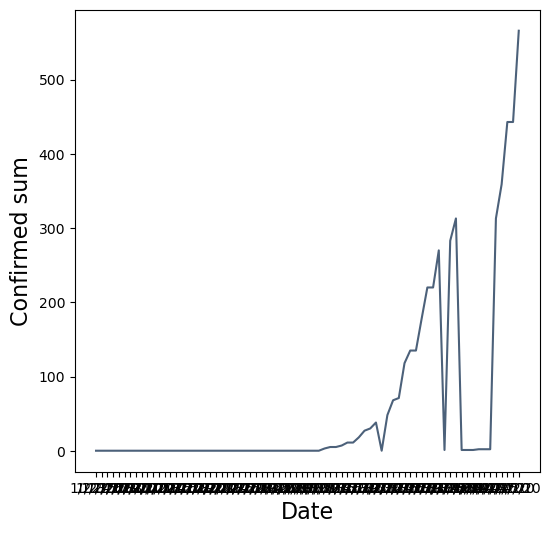

In [ ]:
######### CONFIRMED CASES THROUGH TIME ##############
sorted_covid_ac.plot("Date", "Confirmed sum")

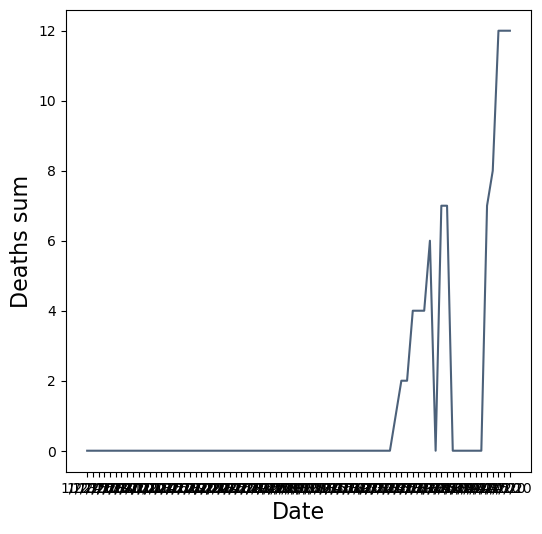

In [ ]:
#### FIX xticks, seems like .plot isn't keeping the dates properly annoying smh
sorted_covid_ac.plot("Date", "Deaths sum")

Why was there such a big gap with no cases? If there were covid cases earlier than March 22, 2020 why were they not recorded? 

In [ ]:
plt.plot(alameda_county['Date'], alameda_county['Deaths']);
plt.xticks(['1/22/20', '2/22/20', '3/22/20', '4/1/20'], rotation=45);

NameError: name 'alameda_county' is not defined

In [ ]:
plt.plot(alameda_county['Date'], alameda_county['Confirmed']);
plt.xticks(['1/22/20', '2/22/20', '3/22/20', '4/1/20'], rotation=45);

In [ ]:
ds.make_array(1,2,3)